# Part I: Different Model Specs


## A. Regression without regularization


1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("/content/Hitters.csv")

In [ ]:
df = df.dropna()

In [ ]:
lr = LinearRegression()

In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)

In [ ]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [ ]:
ct = ColumnTransformer(
    [
        ("one_hot_encode", OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)),
        ("scale", StandardScaler(), make_column_selector(dtype_include='number'))
    ],
    remainder='passthrough'
)

In [ ]:

my_pipeline = Pipeline(
    [('transform', ct), ('linear_regression', lr)]
)

In [ ]:
my_pipeline.fit(X, y)

y_pred_corrected = my_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y_pred_corrected, y)
r2, mse

(0.16888673312301172, 92017.86901772917)

In [ ]:
feature_names_transformed = my_pipeline.named_steps['transform'].get_feature_names_out()

coefficients = my_pipeline.named_steps['linear_regression'].coef_

coefficients_df = pd.DataFrame({'Feature': feature_names_transformed, 'Coefficient': coefficients})

coefficients_df_sorted = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

top_coefficients = coefficients_df_sorted.head()
top_coefficients


,Feature,Coefficient
16,scale__CRuns,480.747135
13,scale__CAtBat,-391.038655
7,scale__Hits,337.830479
6,scale__AtBat,-291.094556
17,scale__CRBI,260.689886


As we see above, these are the 5 features with the largest impact on salary. Below is the expected MSE for 1989 salaries

In [ ]:
from sklearn.model_selection import cross_val_score

n_folds = 5

mse_scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_squared_error', cv=n_folds)
mse_scores_abs = -mse_scores
mean_mse = np.mean(mse_scores_abs)
std_mse = np.std(mse_scores_abs)

mean_mse, std_mse


(121136.31031816879, 46515.09737960848)

# B. Ridge regression
Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

Use cross-validation to tune the
 hyperparameter.

Fit the pipeline with your chosen
 to the full dataset, and interpret a few of the most important coefficients.

Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_", Ridge(alpha = 100))]
)

# consider using max_iter=10000

In [ ]:
ridge_pipeline.fit(X, y)

v = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.38516088404794235

In [ ]:
feature_names_transformed = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()

coefficients = ridge_pipeline.named_steps['ridge_'].coef_

coefficients_df = pd.DataFrame({'Feature': feature_names_transformed, 'Coefficient': coefficients})

coefficients_df_sorted = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

top_coefficients = coefficients_df_sorted.head()
top_coefficients

,Feature,Coefficient
19,scale__PutOuts,56.869491
7,scale__Hits,49.466472
17,scale__CRBI,47.295439
16,scale__CRuns,45.308367
14,scale__CHits,44.650002


As we see above, these are the 5 features with the largest impact on salary and below the expected MSE for 1989 salaries

In [ ]:
y_pred_corrected = ridge_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

105646.38753038955

# C. Lasso Regression
Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

Use cross-validation to tune the
 hyperparameter.

Fit the pipeline with your chosen
 to the full dataset, and interpret a few of the most important coefficients.

Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso(alpha = 10, max_iter=10000))]
)

In [ ]:
lasso_pipeline.fit(X, y)

v = cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.3695224058875658

In [ ]:
param_grid = {
    'lasso__alpha': [0.1, 0.5, 1, 5, 10, 100]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'lasso__alpha': 10}
Best model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ec03c4ed870>),
                                                 ('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ec03c4ec2b0>)])),
                ('lasso', Lasso(alpha=10, max_iter=10000))])


In [ ]:
lasso_pipeline.fit(X, y)

y_pred_corrected = lasso_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.48487877526331535, 104432.72502494455)

In [ ]:
feature_names_transformed = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()

coefficients = lasso_pipeline.named_steps['lasso'].coef_

coefficients_df = pd.DataFrame({'Feature': feature_names_transformed, 'Coefficient': coefficients})

coefficients_df_sorted = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

top_coefficients = coefficients_df_sorted.head()
top_coefficients


,Feature,Coefficient
17,scale__CRBI,134.032027
2,one_hot_encode__Division_E,91.073245
7,scale__Hits,88.741627
16,scale__CRuns,72.227530
19,scale__PutOuts,66.737006


As we see above, these are the 5 features with the largest impact on salary. Below is the expected MSE for 1989 salaries

In [ ]:
cv = cross_val_score(lasso_pipeline, X, y, scoring='r2', cv=5)
np.mean(cv)

0.36952257433764096

# D. Elastic Net
Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

Use cross-validation to tune the
 and
 hyperparameters.

Fit the pipeline with your chosen hyperparameters to the full dataset, and interpret a few of the most important coefficients.

Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elnet", ElasticNet(alpha = 1, l1_ratio= .1))]
)

In [ ]:
param_grid = {
    'elnet__alpha': [0.1, 0.5, 1, 5, 10],
    'elnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'elnet__alpha': 1, 'elnet__l1_ratio': 0.7}
Best model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ec034c929b0>),
                                                 ('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ec034c907f0>)])),
                ('elnet', ElasticNet(alpha=1, l1_ratio=0.7))])


In [ ]:
elastic_pipeline.fit(X, y)

y_pred_corrected = elastic_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.4275834222711581, 116048.45653997909)

In [ ]:
feature_names_transformed = elastic_pipeline.named_steps['preprocessing'].get_feature_names_out()

coefficients = elastic_pipeline.named_steps['elnet'].coef_

coefficients_df = pd.DataFrame({'Feature': feature_names_transformed, 'Coefficient': coefficients})

coefficients_df_sorted = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

top_coefficients = coefficients_df_sorted.head()
top_coefficients


,Feature,Coefficient
2,scale__Hits,72.929085
3,scale__CRBI,65.372215
0,scale__CRuns,61.266095
4,scale__CHits,54.608023
1,scale__PutOuts,52.316213


As we see above, these are the 5 features with the largest impact on salary. Below is the expected MSE for 1989 salaries

In [ ]:
from numpy.lib.function_base import average
cv = cross_val_score(elastic_pipeline, X, y, scoring='r2', cv=5)
np.mean(cv)

0.3815955679486195

# Part II. Variable Selection

Based on the above results, decide on:

Which numeric variable is most important.

Which five numeric variables are most important

Which categorical variable is most important

For each of the four model specifications, compare the following possible feature sets:

Using only the one best numeric variable.

Using only the five best variables.

Using the five best numeric variables and their interactions with the one best categorical variable.

Report which combination of features and model performed best, based on the validation metric of MSE.

(Note:
 and
 must be re-tuned for each feature set.)

1. scale__CRuns	480.747135 is the most important numeric variable
2. 5 most important numeric variables are scale__CRuns	480.747135, scale__PutOuts	56.881522, scale__Hits	337.830479, scale__CRBI	260.689886, and scale__CHits	44.534276
3. one_hot_encode__Division_E	95.413203 is the most important categorical variable.



## Regression without Regularization

Using only the one best numeric variable.

In [ ]:
X = df['CRuns'].values.reshape(-1,1)
y = df['Salary']

In [ ]:
lr.fit(X, y)

y_pred_corrected = lr.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.316606206461607, 138547.3412803566)

Using best 5 variables

In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits']]

lr.fit(X, y)

y_pred_corrected = lr.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.46100930937079343, 109271.88374786508)

Using the five best numeric variables and their interactions with the one best categorical variable.

In [ ]:
df['DivisionE'] = df['Division'] == 'E'

In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits', 'DivisionE']]

In [ ]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_columns = ['DivisionE']
pipeline = Pipeline([
    ("interaction", ColumnTransformer([
        ("interaction_terms", interaction, interaction_columns)
    ], remainder='passthrough')),
    ("scaler", StandardScaler()),
    ("linear_regression", LinearRegression())
])

In [ ]:
pipeline.fit(X,y)
y_pred_corrected = pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.48151857177107915, 105113.9534241664)

# Ridge regression

Using only the one best numeric variable.

In [ ]:
X = df['CRuns'].values.reshape(-1,1)
y = df['Salary']

In [ ]:
ridge_pipeline = Pipeline(
  [
  ("ridge_", Ridge(alpha = 1))]
)

# consider using max_iter=10000

In [ ]:
ridge_pipeline.fit(X,y)
y_pred_corrected = ridge_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.31660620646160675, 138547.34128035666)

In [ ]:
v = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.2922754884568885

Using only the five best variables.

In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits']]

In [ ]:
ridge_pipeline = Pipeline(
  [
  ("ridge_", Ridge(alpha = 10))]
)

In [ ]:
ridge_pipeline.fit(X,y)
y_pred_corrected = ridge_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.4610093093399844, 109271.88375411111)

In [ ]:
v = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.365748631383128

Using the five best numeric variables and their interactions with the one best categorical variable.

In [ ]:
df['DivisionE'] = df['Division'] == 'E'

In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits', 'DivisionE']]

In [ ]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_columns = ['DivisionE']
ridge_pipeline = Pipeline([
    ("interaction", ColumnTransformer([
        ("interaction_terms", interaction, interaction_columns)
    ], remainder='passthrough')),
    ("scaler", StandardScaler()),
    ("ridge_", Ridge(alpha=100))
])

In [ ]:
ridge_pipeline.fit(X,y)
y_pred_corrected = ridge_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.46499514232412176, 108463.81881708482)

In [ ]:

v = cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.3968052979514816

## Lasso Regression

Using only the one best numeric variable.

In [ ]:
X = df['CRuns'].values.reshape(-1,1)
y = df['Salary']

In [ ]:
lasso_pipeline = Pipeline(
  [
  ("lasso", Lasso(alpha = 100, max_iter=10000))]
)

In [ ]:
lasso_pipeline.fit(X, y)

v = cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.2923161751983626

In [ ]:
param_grid = {
    'lasso__alpha': [0.1, 0.5, 1, 5, 10, 100]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'lasso__alpha': 100}
Best model: Pipeline(steps=[('lasso', Lasso(alpha=100, max_iter=10000))])


In [ ]:
y_pred_corrected = lasso_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.316605755073218, 138547.43279225178)

Using only the five best variables.



In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits']]

In [ ]:
lasso_pipeline = Pipeline(
  [
  ("lasso", Lasso(alpha = 100, max_iter=10000))]
)

In [ ]:
lasso_pipeline.fit(X, y)

v = cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.36593662129104015

In [ ]:
param_grid = {
    'lasso__alpha': [0.1, 0.5, 1, 5, 10, 100]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'lasso__alpha': 100}
Best model: Pipeline(steps=[('lasso', Lasso(alpha=100, max_iter=10000))])


In [ ]:
y_pred_corrected = lasso_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.46095450528574666, 109282.99441399395)

Using the five best numeric variables and their interactions with the one best categorical variable.

In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits', 'DivisionE']]

In [ ]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_columns = ['DivisionE']
lasso_pipeline = Pipeline([
    ("interaction", ColumnTransformer([
        ("interaction_terms", interaction, interaction_columns)
    ], remainder='passthrough')),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=10))
])

In [ ]:
lasso_pipeline.fit(X, y)

v = cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.38052847586090166

In [ ]:
param_grid = {
    'lasso__alpha': [0.1, 0.5, 1, 5, 10, 100]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'lasso__alpha': 10}
Best model: Pipeline(steps=[('interaction',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('interaction_terms',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True),
                                                  ['DivisionE'])])),
                ('scaler', StandardScaler()), ('lasso', Lasso(alpha=10))])


In [ ]:
y_pred_corrected = lasso_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.4775601259112455, 105916.46605256265)

## Elastic Net

In [ ]:
X = df['CRuns'].values.reshape(-1,1)

In [ ]:
elastic_pipeline = Pipeline(
  [
  ("elnet", ElasticNet(alpha = 10, l1_ratio= .1))]
)

In [ ]:
param_grid = {
    'elnet__alpha': [0.1, 0.5, 1, 5, 10],
    'elnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'elnet__alpha': 10, 'elnet__l1_ratio': 0.1}
Best model: Pipeline(steps=[('elnet', ElasticNet(alpha=10, l1_ratio=0.1))])


In [ ]:
v = cross_val_score(elastic_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.292280785498596

In [ ]:
elastic_pipeline.fit(X, y)

y_pred_corrected = elastic_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.31660620364659287, 138547.34185105644)

Using only the five best variables.



In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits']]

In [ ]:
elastic_pipeline = Pipeline(
  [
  ("elnet", ElasticNet(alpha = 10, l1_ratio= .1))]
)

In [ ]:
param_grid = {
    'elnet__alpha': [0.1, 0.5, 1, 5, 10],
    'elnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'elnet__alpha': 10, 'elnet__l1_ratio': 0.1}
Best model: Pipeline(steps=[('elnet', ElasticNet(alpha=10, l1_ratio=0.1))])


In [ ]:
v = cross_val_score(elastic_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.3659858240007514

In [ ]:
elastic_pipeline.fit(X, y)

y_pred_corrected = elastic_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.46100747845818435, 109272.25493659478)

Using the five best numeric variables and their interactions with the one best categorical variable.



In [ ]:
X = df[['CRuns', 'PutOuts', 'Hits', 'CRBI', 'CHits', 'DivisionE']]

In [ ]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_columns = ['DivisionE']
elastic_pipeline = Pipeline([
    ("interaction", ColumnTransformer([
        ("interaction_terms", interaction, interaction_columns)
    ], remainder='passthrough')),
    ("scaler", StandardScaler()),
    ("elnet", ElasticNet(alpha=.5, l1_ratio = 0.1))
])

In [ ]:
elastic_pipeline.fit(X, y)

y_pred_corrected = elastic_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.4616122422654825, 109149.64858810877)

In [ ]:
param_grid = {
    'elnet__alpha': [0.1, 0.5, 1, 5, 10],
    'elnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'elnet__alpha': 0.5, 'elnet__l1_ratio': 0.1}
Best model: Pipeline(steps=[('interaction',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('interaction_terms',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True),
                                                  ['DivisionE'])])),
                ('scaler', StandardScaler()),
                ('elnet', ElasticNet(alpha=0.5, l1_ratio=0.1))])


In [ ]:
v = cross_val_score(elastic_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.3969119066371475

The model that performed best for each is as follows:

No Regularlization: Using the five best numeric variables and their interactions with the one best categorical variable.

Ridge: Using the five best numeric variables and their interactions with the one best categorical variable.

Lasso: Using the five best numeric variables and their interactions with the one best categorical variable.

Elastic Net: Using the five best numeric variables and their interactions with the one best categorical variable.

# Part III. Discussion


## A. Ridge
Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

In [ ]:
feature_names = X.columns

coefficients = ridge_pipeline.named_steps['ridge_'].coef_

pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

,Feature,Coefficient
3,CRBI,91.587500
4,CHits,79.778440
1,PutOuts,68.927274
2,Hits,66.021912
5,DivisionE,55.435101
0,CRuns,51.530692


The coefficients above are much smaller than the ordinary regression model. This makes sense because there is a penalty in ridge for large coefficients to fit the data.

## B. LASSO
Compare your LASSO model in I with your three LASSO models in II. Did you get the same
 results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

I did not get the same results, my best lambda went from 10 to 100. I also did not get the same MSEs, which makes sense because the coefficients and the variables changed.

## C. Elastic Net
Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

Elastic Net should win because it focuses on the measureable vairables with accurate coefficients and is more flexible than either one.

# Part IV: Final Model
Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.

In [ ]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso(alpha = 10, max_iter=10000))]
)

In [ ]:
lasso_pipeline.fit(X, y)

v = cross_val_score(lasso_pipeline, X, y, cv = 5, scoring = 'r2')
np.average(v)

0.38062524987208973

In [ ]:
param_grid = {
    'lasso__alpha': [0.1, 0.5, 1, 5, 10, 100]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='r2')

In [ ]:
grid_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

Best parameters: {'lasso__alpha': 10}
Best model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ec03499cdc0>),
                                                 ('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ec03499c4c0>)])),
                ('lasso', Lasso(alpha=10, max_iter=10000))])


In [ ]:
lasso_pipeline.fit(X, y)

y_pred_corrected = lasso_pipeline.predict(X)
mse = mean_squared_error(y, y_pred_corrected)
mse

r2 = r2_score(y, y_pred_corrected)
r2, mse

(0.47616036772158266, 106200.24500614234)

In [ ]:
from plotnine import *

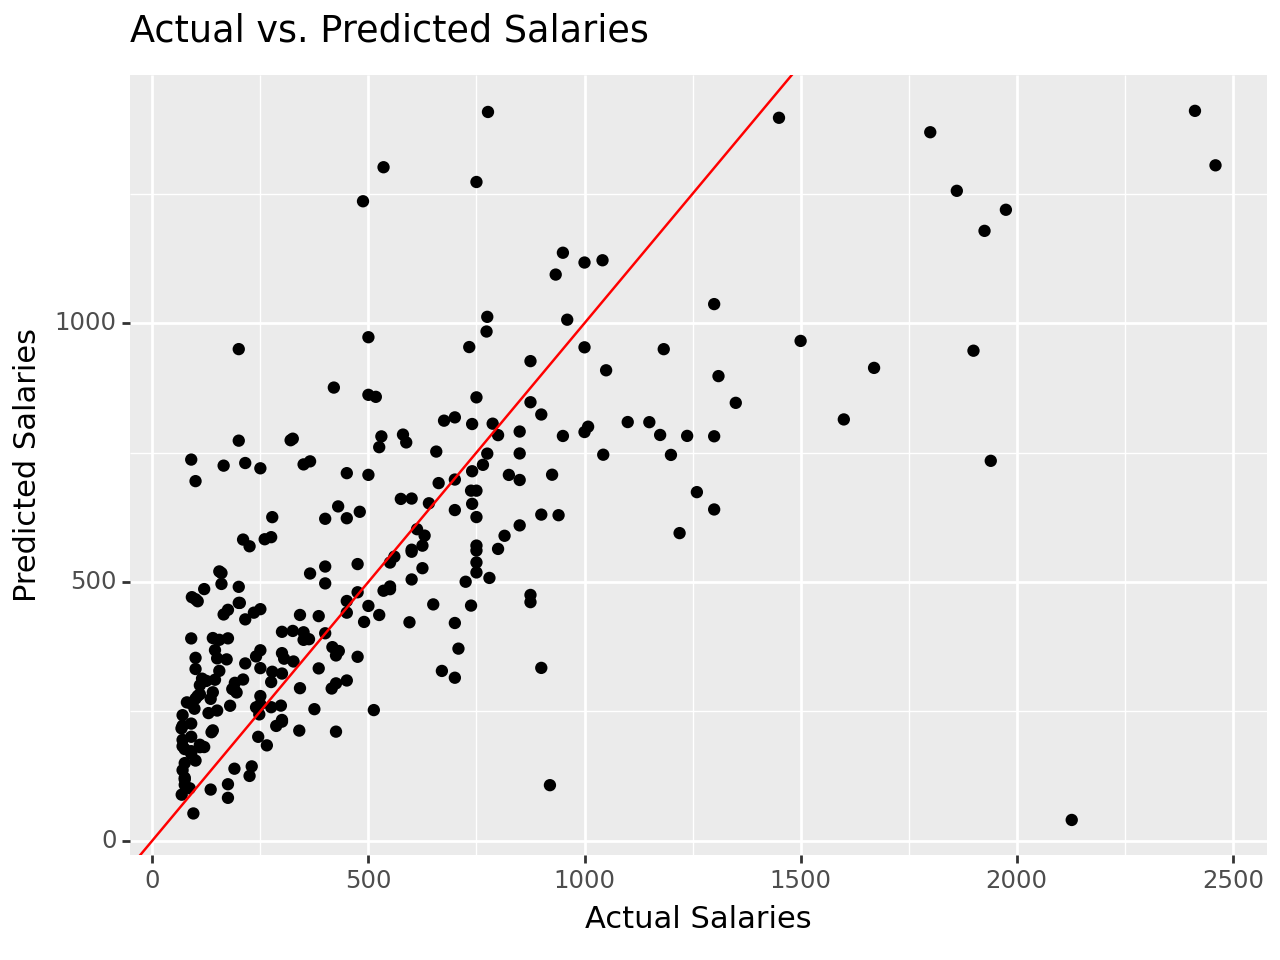

<Figure Size: (640 x 480)>

In [ ]:
data = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred_corrected
})

plot = (
    ggplot(data, aes(x='Actual', y='Predicted')) +
    geom_point() +  # Scatter plot
    geom_abline(slope=1, intercept=0, color="red") +
    labs(x='Actual Salaries', y='Predicted Salaries', title='Actual vs. Predicted Salaries')
)

plot

In the final plot/model, there appears to be some heteroscadicity that may need to be addressed.